In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv("data/smhi-lufttemperatur.csv", sep=";")

In [26]:
df

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
0,2010-03-01,00:00:00,2.0,G
1,2010-03-01,01:00:00,2.2,Y
2,2010-03-01,02:00:00,2.2,Y
3,2010-03-01,03:00:00,1.7,G
4,2010-03-01,04:00:00,1.7,Y
...,...,...,...,...
108214,2022-08-01,02:00:00,16.2,G
108215,2022-08-01,03:00:00,16.0,G
108216,2022-08-01,04:00:00,16.1,G
108217,2022-08-01,05:00:00,17.4,G


### Data preprocessing

In [31]:
def transform(df_: pd.DataFrame) -> pd.DataFrame:
    return (df_
        .rename(columns={"Lufttemperatur": "y", "Kvalitet": "quality"})
        .assign(ds=pd.to_datetime(df_["Datum"] + " " + df_["Tid (UTC)"]))
        .query("quality != 'Y'")
        .loc[:, ("ds", "y")] # type: ignore
        .astype({"y": np.int8}))

In [32]:
weather = transform(df)

In [33]:
weather

,ds,y
0,2010-03-01 00:00:00,2
3,2010-03-01 03:00:00,1
6,2010-03-01 06:00:00,1
9,2010-03-01 09:00:00,1
12,2010-03-01 12:00:00,1
...,...,...
108214,2022-08-01 02:00:00,16
108215,2022-08-01 03:00:00,16
108216,2022-08-01 04:00:00,16
108217,2022-08-01 05:00:00,17


In [37]:
weather.min(), weather.max()

(ds    2010-03-01 00:00:00
 y                     -14
 dtype: object,
 ds    2022-08-01 06:00:00
 y                      30
 dtype: object)

In [324]:
weather.isna().sum()

temperature    0
dtype: int64

### Data exploration

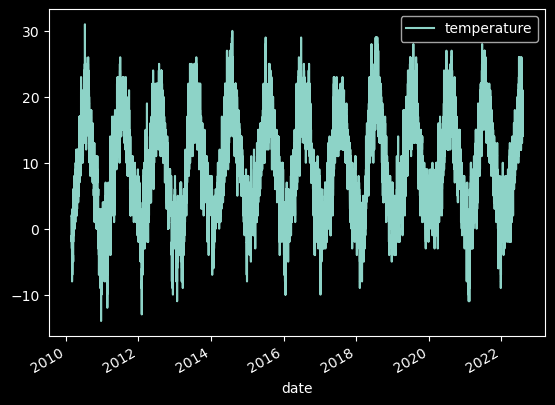

In [325]:
weather.plot();

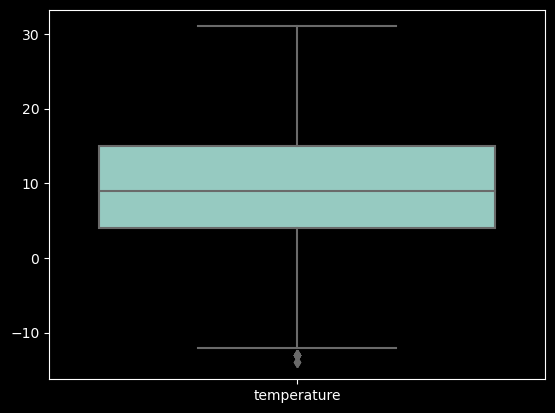

In [326]:
sns.boxplot(data=weather);

### 1. Spliting

In [ ]:
# split data into predictors and response
train = weather[weather['ds'] < pd.Timestamp('2019-01-01')]
test = weather[weather['ds'] >= pd.Timestamp('2019-01-01')]

In [ ]:
# fit model - ignore train/test split for now
m = Prophet()
m.fit(train)

### 2. Modeling

### 3. Evaluatiation